In [1]:
import torch
import numpy as np

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cuda:0


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image

import matplotlib.pyplot as plt

In [3]:
cifar10 = torchvision.datasets.CIFAR10(root='../data', train=True , download = False)

In [4]:
cifar10

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../data
    Split: Train

In [5]:
def display_images():
    fig, subplots = plt.subplots(1,5, figsize=(13,6))
    for i in range(5):
        axil = subplots.flat[i]
        original_img = Image.fromarray(cifar10.data[i])
        axil.imshow(original_img)
        axil.set_title('original_img')

In [6]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

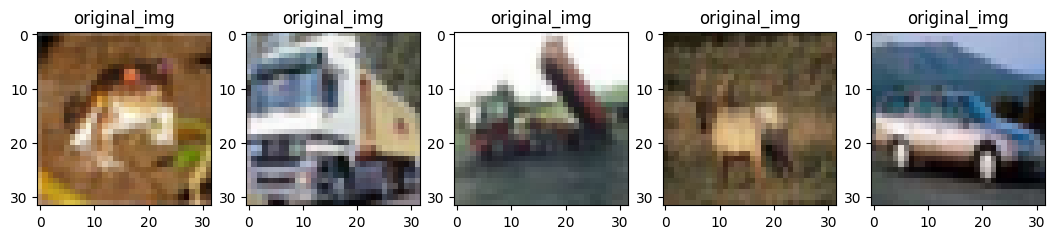

In [7]:
display_images()

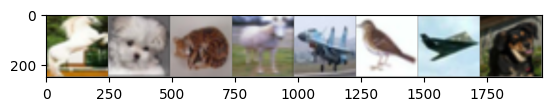

horse dog   cat   horse plane bird  plane dog  


In [19]:
import matplotlib.pyplot as plt
import numpy as np

#functions to show an image

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

#show images
imshow ( torchvision.utils.make_grid(images))
#print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [8]:
import torch
import torchvision
import torchvision.transforms as transforms

In [11]:
transform = transforms.Compose([
    transforms.Resize((244,244)),
    transforms.ToTensor(), # Tensor로 변환시 채널의 위치가 바뀜, (H,W,C) -> (C,H,W)로 변환됨
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])


batch_size = 8 # 너무 큰 값은 연산이 힘들 수 있음
trainset = torchvision.datasets.CIFAR10 ( root = '../data' , train=True,
                                          download = True , transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle=True , num_workers=2)

testset = torchvision.datasets.CIFAR10(root = '../data', train=False,
                                       download=True , transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size,
                                         shuffle = False, num_workers=2)
classes = ('plane' , 'car', 'bird', 'cat','deer','dog','frog','horse','ship','truck')

Files already downloaded and verified
Files already downloaded and verified


In [9]:
from torchvision import models
import torch.nn as nn
import torch.nn.functional as F

In [12]:
resnet_pt = models.resnet18(pretrained=True)
# freezing
# for param in resnet_pt.parameters():
#     param.requires_grad = False

# fc layer 수정
fc_in_features = resnet_pt.fc.in_features
resnet_pt.fc = nn.Linear(fc_in_features, len(classes))
resnet_pt = resnet_pt.to(device)

In [13]:
from torchsummary import summary
summary(resnet_pt, (3,244,244))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 122, 122]           9,408
       BatchNorm2d-2         [-1, 64, 122, 122]             128
              ReLU-3         [-1, 64, 122, 122]               0
         MaxPool2d-4           [-1, 64, 61, 61]               0
            Conv2d-5           [-1, 64, 61, 61]          36,864
       BatchNorm2d-6           [-1, 64, 61, 61]             128
              ReLU-7           [-1, 64, 61, 61]               0
            Conv2d-8           [-1, 64, 61, 61]          36,864
       BatchNorm2d-9           [-1, 64, 61, 61]             128
             ReLU-10           [-1, 64, 61, 61]               0
       BasicBlock-11           [-1, 64, 61, 61]               0
           Conv2d-12           [-1, 64, 61, 61]          36,864
      BatchNorm2d-13           [-1, 64, 61, 61]             128
             ReLU-14           [-1, 64,

In [14]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet_pt.parameters() , lr = 0.001 , momentum = 0.9)

In [15]:
resnet_pt.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [16]:
for epoch in range(2):
    running_loss = 0.0
    for i , data in enumerate(trainloader,0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = resnet_pt(inputs)
        loss = criterion(outputs , labels)
        loss.backward()
        optimizer.step()

        #print statistics
        running_loss += loss.item()
        if i %1000 == 999:
            print(f'[{epoch+1} , {i+1:5d}] loss : {running_loss / 2000:.3f}')
            running_loss = 0.0


print('finished Training')

[1 ,  1000] loss : 0.436
[1 ,  2000] loss : 0.272
[1 ,  3000] loss : 0.234
[1 ,  4000] loss : 0.216
[1 ,  5000] loss : 0.200
[1 ,  6000] loss : 0.182
[2 ,  1000] loss : 0.118
[2 ,  2000] loss : 0.126
[2 ,  3000] loss : 0.129
[2 ,  4000] loss : 0.133
[2 ,  5000] loss : 0.125
[2 ,  6000] loss : 0.123
finished Training


In [17]:
 PATH = '../weight/cifar2_resnet.pth'
torch.save(resnet_pt.state_dict(), PATH)

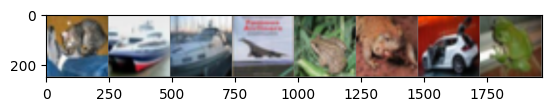

GroundTruth:  cat   ship  ship  plane


In [20]:
dataiter = iter(testloader)
images, labels = next(dataiter)

#print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' ' .join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [21]:
# resnet = resnet_pt().to(device)
resnet_pt.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [22]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs

with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = resnet_pt(images.to(device))
        # the class with the highest energy is what we choose as prediction
        _ , predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy {100 * correct // total} %')

Accuracy 89 %


In [23]:
# prepare to count predictions for each class
correct_pred = {classname:0 for classname in classes}
total_pred = {classname : 0 for classname in classes}

#again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = resnet_pt(images.to(device))
        _ , predictions = torch.max(outputs.data, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] +=1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class : {classname:5s} is {accuracy:.1f} %')

Accuracy for class : plane is 92.1 %
Accuracy for class : car   is 91.3 %
Accuracy for class : bird  is 87.4 %
Accuracy for class : cat   is 63.9 %
Accuracy for class : deer  is 92.8 %
Accuracy for class : dog   is 90.9 %
Accuracy for class : frog  is 95.5 %
Accuracy for class : horse is 94.2 %
Accuracy for class : ship  is 94.9 %
Accuracy for class : truck is 93.1 %


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([64, 3, 7, 7])


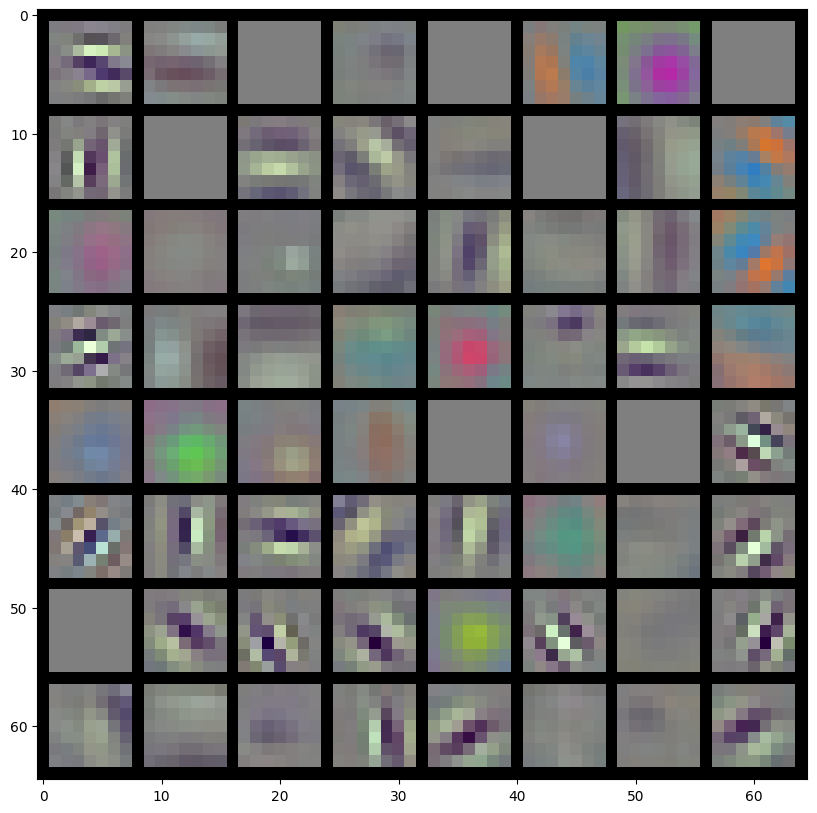

In [27]:
for w in resnet_pt.parameters():
    w = w.data.cpu()
    print(w.shape)
    break

min_w = torch.min(w)
w1 = (-1/(2* min_w)) * w + 0.5

grid_size = len(w1)
x_grid = [w1[i] for i in range(grid_size)]
x_grid = torchvision.utils.make_grid(x_grid , nrow=8 , padding = 1).permute(1,2,0)

plt.figure(figsize = (10,10))
plt.imshow(x_grid)
plt.show()